In [1]:
#%matplotlib notebook
%matplotlib widget
import numpy as np
import scipy as scy
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from IPython import display
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML
import random
from matplotlib.animation import FuncAnimation

In [2]:
l=0
m=0
def update_plot(n):
    Yml=scy.special.sph_harm(m, l, PHI, TH, out=None)
    coeff = np.sqrt((2 / (n * a0))**3 * (math.factorial(n - l - 1) / (2 * n * np.math.factorial(n + l))))
    laguerre_poly = scy.special.assoc_laguerre(2 * RR / (n * a0), n - l - 1, k=2 * l + 1)#scy.special.genlaguerre(n - l - 1, 2 * l + 1)
    u = coeff * np.exp(-RR / (n * a0)) * (2 * RR / (n * a0))**l * laguerre_poly
    R=u#/RR
    psi=(R*Yml)
    mask = np.abs(psi)**2 > np.mean(np.abs(psi)**2)
    mask1=mask.astype(int)
    # Filter your X, Y, and Z data based on the mask
    X_non_zero = X*mask1
    Y_non_zero = Y*mask1
    Z_non_zero = Z*mask1
    
    fig1 = plt.figure(figsize=(10,10))
    ax = fig1.add_subplot(111, projection='3d')
    ax.scatter(X_non_zero, Y_non_zero, Z_non_zero,s=1/10)
    ax.view_init(azim=270, elev=10)
    ax.set_box_aspect([1, 1, 1])
    plt.grid('on')

In [3]:
from ipywidgets import interact

In [4]:
def update(p):
    plt.scatter(1,p)

Shrodinger equation says that:
$$i\hbar\frac{\partial \Psi}{\partial t}=-\frac{\hbar}{2m}\nabla^2\Psi+V(r)\Psi$$



$$\Psi(x,t)=\psi(x)\Phi(t)$$
\begin{equation}
 \Phi(t)=e^{-i\frac{E_n}{\hbar}t}
\end{equation}


The time independant equation
$$-\frac{\hbar}{2m}\nabla^2\Psi+V(r)\Psi=E\Psi$$

$$V(r)=-\frac{1}{4\pi\epsilon_0}\frac{e^2}{|r|}$$

In [5]:
N=100
phi=np.linspace(0,2*np.pi,N)
th=np.linspace(0,np.pi,N)
r=np.linspace(0.001,25,N)

RR,PHI,TH=np.meshgrid(r,phi,th)

X=RR*np.cos(PHI)*np.sin(TH)
Y=RR*np.sin(TH)*np.sin(PHI)
Z=RR*np.cos(TH)

In [162]:
n=4
l=3
m=1

a0=1



## Mediciones Aleatorias

In [163]:
N=1000000
PHI=np.random.uniform(0,2*np.pi, N)
TH=np.random.uniform(0,np.pi, N)
RR=np.random.uniform(0.001, 25, N)

#RR,PHI,TH=np.meshgrid(r,phi,th)

X=RR*np.cos(PHI)*np.sin(TH)
Y=RR*np.sin(TH)*np.sin(PHI)
Z=RR*np.cos(TH)

### $Y_l^m$

In [164]:
Yml=scy.special.sph_harm(m, l, PHI, TH, out=None)

$R$

In [165]:
coeff = np.sqrt((2 / (n * a0))**3 * (np.math.factorial(n - l - 1) / (2 * n * np.math.factorial(n + l))))
laguerre_poly = scy.special.assoc_laguerre(2 * RR / (n * a0), n - l - 1, k=2 * l + 1)#scy.special.genlaguerre(n - l - 1, 2 * l + 1)
u = coeff * np.exp(-RR / (n * a0)) * (2 * RR / (n * a0))**l * laguerre_poly
R=u
psi=(R*Yml)

In [166]:
psi2=np.abs(psi)**2/np.sum(np.abs(psi)**2)
psi3=psi2/np.max(psi2)

In [167]:

# Choose elements with different probabilities
MM=np.zeros(N)
for i in range (0,N):
    p1=psi3[i]
    MM[i]= np.random.choice([1,0], 1,p=[p1,1-p1])
MM1=MM>0

(-35.35311471101868,
 36.217639911117345,
 -35.517088655876144,
 36.05366596625988)

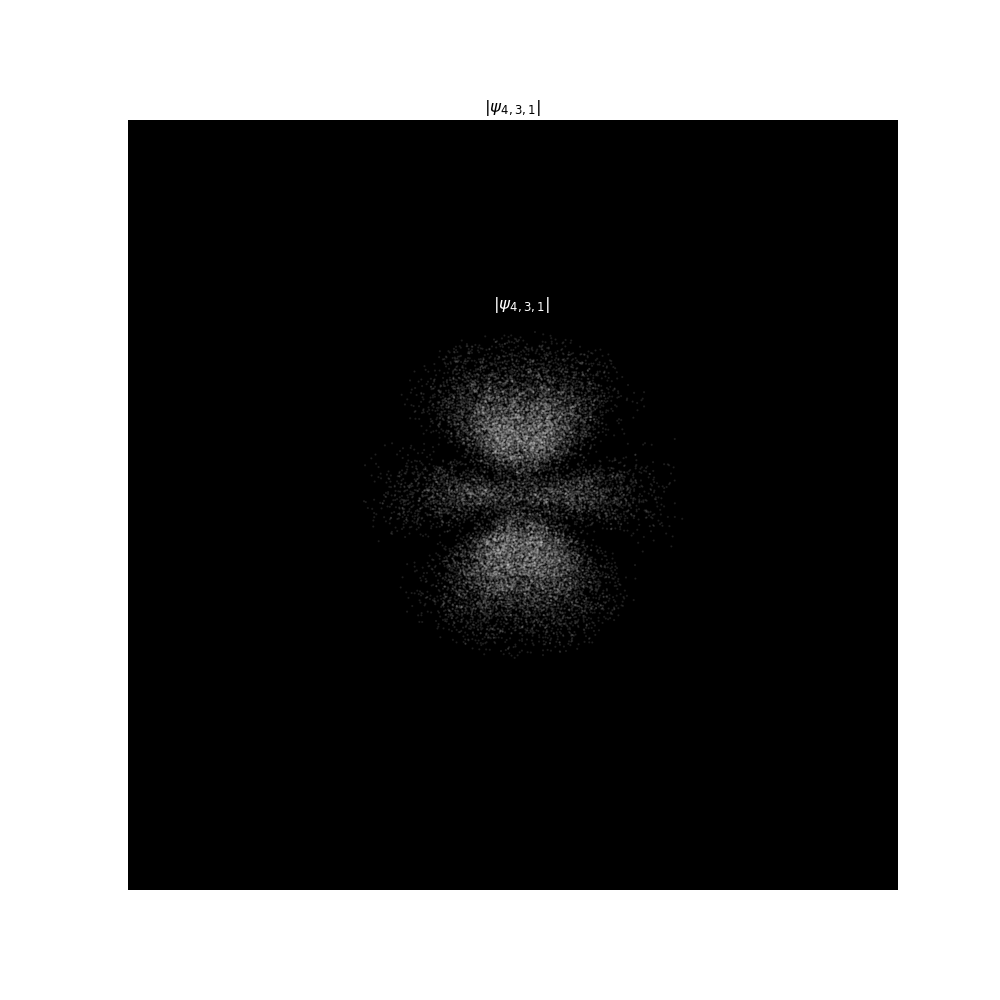

In [168]:
fig2 = plt.figure(figsize=(10,10))
bx = fig2.add_subplot(111, projection='3d')
bx.set_facecolor("black")
pp=10
bx.text(0, 0, 30,r"$|\psi_{"+str(n)+","+str(l)+","+str(m)+"}|$",ha='center', va='top',fontsize=12,color="white")
bx.scatter((X*MM)[MM1][0:-1:pp], (Y*MM)[MM1][0:-1:pp], (Z*MM)[MM1][0:-1:pp],s=1/3,alpha=0.1,color="white",label=r"$|\psi_{"+str(n)+","+str(l)+","+str(m)+"}|$") #,c=np.abs(psi*mask1)**2,alpha=1000*np.abs(psi*mask1)**2#c=psi2[MM1]
plt.title(r"$|\psi_{"+str(n)+","+str(l)+","+str(m)+"}|$")
bx.view_init(azim=1, elev=0)
plt.axis('off')
    # Set the axes to be equal
plt.axis('equal')

In [169]:
fig1 = plt.figure(figsize=(10,10));
ax = fig1.add_subplot(111, projection='3d');
ax.set_facecolor("black")
def updatefi(tt):
    pp=1
    ax.clear()
    ax.text(0, 0, 30,r"$|\psi_{"+str(n)+","+str(l)+","+str(m)+"}|$",ha='center', va='top',fontsize=12,color="white")
    ax.scatter((X*MM)[MM1][0:-1:pp], (Y*MM)[MM1][0:-1:pp], (Z*MM)[MM1][0:-1:pp],s=1/3,alpha=0.1,color="white",label=r"$|\psi_{"+str(n)+","+str(l)+","+str(m)+"}|$") #,c=np.abs(psi*mask1)**2,alpha=1000*np.abs(psi*mask1)**2#c=psi2[MM1]
    plt.title(r"$|\psi_{"+str(n)+","+str(l)+","+str(m)+"}|$")
    ax.view_init(azim=tt, elev=tt/30)
    # Set the axes to be equal
    plt.axis('off')
    plt.axis('equal')
    return fig1;
#fig1.canvas.draw()
tt=np.linspace(0,360,100)
anim = FuncAnimation(fig1, updatefi, frames=tt,interval=24)
# Save the frames to the video file using ffmpeg writer
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

(-15.856404479990065,
 15.428568951025657,
 -15.686788989246416,
 15.598184441769305)

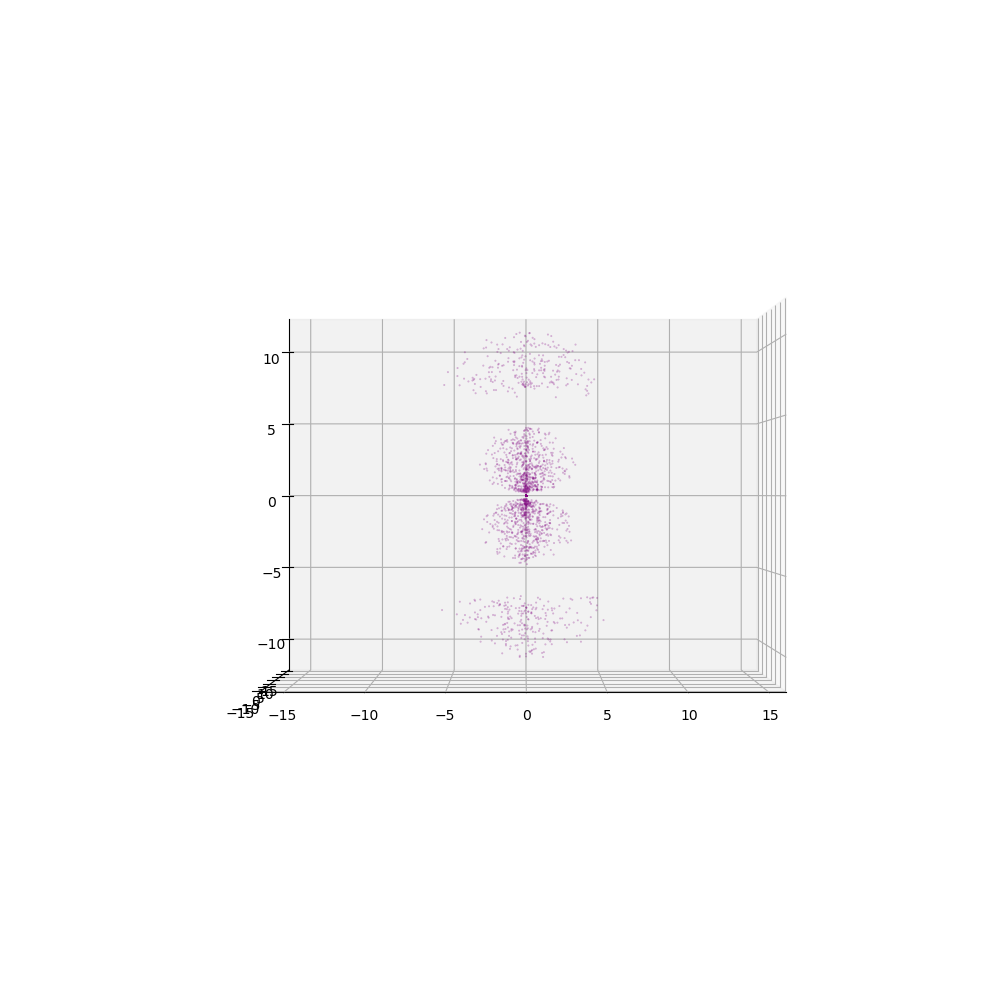

In [168]:
mask = np.abs(psi)**2 > np.mean(np.abs(psi)**2)
mask1=mask.astype(int)

# Filter your X, Y, and Z data based on the mask
X_non_zero = X*mask1
Y_non_zero = Y*mask1
Z_non_zero = Z*mask1

fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(111, projection='3d')


###
#fig = plt.figure()
#ax1 = Axes3D(fig)
ax.scatter(X_non_zero, Y_non_zero, Z_non_zero,s=1/5,color="purple",alpha=0.3)
# Plot only the non-zero points
#ax.scatter(X_non_zero, Y_non_zero, Z_non_zero,s=1/10, c=np.abs(psi*mask1)**2,alpha=1000*np.abs(psi*mask1)**2)  # Adjust the 's' value as needed
ax.view_init(azim=270, elev=0)
# Set the axes to be equal
plt.axis('equal')
#plt.axis('off')
#ax.set_facecolor('black')
#ax.set_box_aspect([1, 1, 1])

# Add labels for the axes if needed
#ax.set_xlabel('X Axis Label')
#ax.set_ylabel('Y Axis Label')
#ax.set_zlabel('Z Axis Label')

#plt.show()

In [108]:
mask = np.abs(psi)**2 > np.mean(np.abs(psi)**2)
mask1=mask.astype(int)

# Filter your X, Y, and Z data based on the mask
X_non_zero = X*mask1
Y_non_zero = Y*mask1
Z_non_zero = Z*mask1
X2=X_non_zero.reshape(10,-1)
Y2=Y_non_zero.reshape(10,-1)
Z2=Z_non_zero.reshape(10,-1)

Mo